In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('musics.csv')
df = df.drop(["artist","year","song"],axis = 1)
df2 = df    # we are dealing with df (the main dataframe)
df3 = df
df3_pop = df3["popularity"]
df3 = df3.drop(["popularity"],axis = 1)
df = df.drop(["popularity","explicit"],axis = 1)
df.describe()
print(df.isna().sum())
#print(df)   # df is without "popularity" & "explicit"

duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64


### Deleting rows with genre == set()

In [3]:
#print(len(df.loc[df['genre'] == 'set()']))
mn = df.loc[df['genre'] == 'set()']
mnn = mn.index      
df = df.drop(mnn,axis = 0)
df2 = df2.drop(mnn,axis = 0)
#df3 = df3.drop(mnn,axis = 0)


#print(len(df))      #1978 rows 
#print(len(df2))      #1978 rows 

# Section الف

### Quantify popularity values

In [4]:
pop_list1 = df2["popularity"].tolist()
pop_list3 = df3_pop.tolist()

def altrpop(x):   # for replacing popularity values with range(5)
    y = []
    for i in range(len(x)):
        if x[i] <= 20:
            y.append(1)      #Unpopular 
        elif 20 < x[i] <= 40:
            y.append(2)      #Few popular 
        elif 40 < x[i] <= 60:
            y.append(3)      #pretty popular 
        elif 60 < x[i] <= 80:
            y.append(4)      #much popular 
        else:
            y.append(5)      #The most popular 
    return y 

df["popularity"] = altrpop(pop_list1)
df3["popularity"] = altrpop(pop_list3)


#print(df["popularity"].unique())
#print(df["popularity"].nunique())
#print(len(df))
#print(df.iloc[69])


In [5]:
list11 = df["popularity"].tolist()
print(f"Total number of data: {len(list11)}")
print(f"Number of data with popularity == 1: {list11.count(1)}")
print(f"Number of data with popularity == 2: {list11.count(2)}")
print(f"Number of data with popularity == 3: {list11.count(3)}")
print(f"Number of data with popularity == 4: {list11.count(4)}")
print(f"Number of data with popularity == 5: {list11.count(5)}")
# print(len(df))
# print(len(df2))
# print(len(df3))

Total number of data: 1978
Number of data with popularity == 1: 183
Number of data with popularity == 2: 37
Number of data with popularity == 3: 470
Number of data with popularity == 4: 1196
Number of data with popularity == 5: 92


## Section ب

In [6]:
exp_list2 = df2["explicit"].tolist()
#print(exp_list)

def altrexp(x):  #for replacing qualitative "explicit" 
                     #column  values with quantitative values
    y = []
    for i in range(len(x)):
        if x[i] == False:
            y.append(0)
        elif x[i] == True:
            y.append(1)
    return y
            
df["explicit"] = altrexp(exp_list2)

#print(df["explicit"].unique())
#print(df["explicit"].nunique())

### working with "strings"

In [7]:
print(df['genre'])
genre_list = df["genre"].tolist()

print(genre_list)

genre_set = set(genre_list)
print(genre_set)

app_list = []
for i in genre_set:
    j = i.split(", ")
    app_list.append(j)

print(app_list)

def flatten(l):     # for flattening the list
    return [item for sublist in l for item in sublist]

def strp(l):     #for stripping items of the llist 
    app_list2 = []
    for item in l:
        j = item.strip()
        app_list2.append(j)
    return app_list2


0                    pop
1              rock, pop
2           pop, country
3            rock, metal
4                    pop
              ...       
1995                 pop
1996                 pop
1997    hip hop, country
1998                 pop
1999             hip hop
Name: genre, Length: 1978, dtype: object
['pop', 'rock, pop', 'pop, country', 'rock, metal', 'pop', 'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B', 'Dance/Electronic', 'pop', 'pop', 'pop', 'rock, pop', 'pop, Dance/Electronic', 'hip hop, pop, R&B', 'pop', 'pop', 'pop', 'hip hop', 'rock, metal', 'rock, Folk/Acoustic, easy listening', 'pop', 'hip hop', 'pop, Dance/Electronic', 'metal', 'pop, Dance/Electronic', 'hip hop, pop, R&B', 'pop, Dance/Electronic', 'Dance/Electronic', 'hip hop, pop', 'pop, R&B', 'pop', 'R&B', 'pop', 'hip hop, pop, R&B', 'pop, Dance/Electronic', 'hip hop', 'pop, country', 'pop, R&B', 'pop, latin', 'pop, R&B', 'hip hop, pop, R&B', 'hip hop', 'hip hop, pop, R&B', 'pop', 'pop', 'pop, R&B', 

### Making a list consists of unique genres

In [8]:
genres_final_list = flatten(app_list)
print(genres_final_list)

genres_final = strp(genres_final_list)
print(genres_final_list)

genres_final_set = set(genres_final_list)
print(genres_final_set)
#print(len(genres_ss))


genres_final_list_print = []
for item in genres_final_set:
    genres_final_list_print.append(item)

print(f"Number of unique genres: {len(genres_final_list_print)}")
print(f"Unique genres are: {genres_final_list_print}")


['rock', 'Folk/Acoustic', 'pop', 'hip hop', 'pop', 'R&B', 'Dance/Electronic', 'Dance/Electronic', 'rock', 'Dance/Electronic', 'pop', 'R&B', 'pop', 'rock', 'Dance/Electronic', 'rock', 'blues', 'latin', 'World/Traditional', 'pop', 'Folk/Acoustic', 'pop', 'easy listening', 'Dance/Electronic', 'hip hop', 'pop', 'rock', 'hip hop', 'latin', 'Dance/Electronic', 'pop', 'R&B', 'easy listening', 'World/Traditional', 'Folk/Acoustic', 'World/Traditional', 'hip hop', 'hip hop', 'pop', 'country', 'easy listening', 'pop', 'rock', 'Folk/Acoustic', 'rock', 'rock', 'pop', 'metal', 'Dance/Electronic', 'rock', 'classical', 'hip hop', 'country', 'country', 'latin', 'latin', 'rock', 'pop', 'hip hop', 'pop', 'R&B', 'latin', 'World/Traditional', 'rock', 'pop', 'rock', 'pop', 'Dance/Electronic', 'rock', 'metal', 'Folk/Acoustic', 'rock', 'pop', 'Folk/Acoustic', 'pop', 'pop', 'Dance/Electronic', 'World/Traditional', 'rock', 'hip hop', 'pop', 'rock', 'Folk/Acoustic', 'country', 'rock', 'R&B', 'Folk/Acoustic', 'po

### One hot encoding

In [9]:
print(genres_final_list_print)
arr2 = []
#print(len(genre_list))

for i in range(len(genre_list)):
    genre_list[i] = genre_list[i].split(", ")
    print(genre_list[i])
    arr1 = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for item in genre_list[i]:
        for j in range(len(arr1)):
            if item == genres_final_list_print[j]:
                arr1[j] = 1
    print(arr1)
    arr2.append(arr1)
     
#print(arr2)
#print(len(arr2))

['jazz', 'Dance/Electronic', 'easy listening', 'hip hop', 'blues', 'country', 'classical', 'latin', 'World/Traditional', 'rock', 'Folk/Acoustic', 'pop', 'metal', 'R&B']
['pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['rock', 'pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
['pop', 'country']
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
['rock', 'metal']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
['pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['hip hop', 'pop', 'R&B']
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
['hip hop']
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['pop', 'rock']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
['pop', 'R&B']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
['Dance/Electronic']
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
['pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
['rock', 'pop']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
['pop', 'Dance/Electronic']
[0

In [10]:
df["new_genre"]  = arr2

# Section ج

### Features

In [11]:
features = []

for item in df.columns:
    if item == "popularity" or item == "new_genre" or item == "genre" or item == "instrumentalness":
        continue
    features.append(item)
print(features)
#print(len(features))
#df["popularity"].unique()

['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo', 'explicit']


In [12]:
import seaborn as sns

### detecting outliers for "instrumentalness"

In [13]:
def detect_outlier(data_1):   
    outliers=[]
    outliers_index = []
    threshold= 1.2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for i,y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
            outliers_index.append(i)
    return outliers,outliers_index

outlier ,outlier_ind = detect_outlier(df3["instrumentalness"])
#print(len(outlier),len(outlier_ind))
df3 = df3.drop(outlier_ind,axis = 0)
print(df3)
#print(len(df3))

      duration_ms  explicit  danceability  energy  key  loudness  mode  \
0          211160     False         0.751   0.834    1    -5.444     0   
1          167066     False         0.434   0.897    0    -4.918     1   
2          250546     False         0.529   0.496    7    -9.007     1   
3          224493     False         0.551   0.913    0    -4.063     0   
4          200560     False         0.614   0.928    8    -4.806     0   
...           ...       ...           ...     ...  ...       ...   ...   
1995       181026     False         0.842   0.734    1    -5.065     0   
1996       178426     False         0.552   0.702    9    -5.707     1   
1997       200593     False         0.847   0.678    9    -8.635     1   
1998       171029     False         0.741   0.520    8    -7.513     1   
1999       215280     False         0.695   0.762    0    -3.497     1   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0437        0.300

### Histogram of features

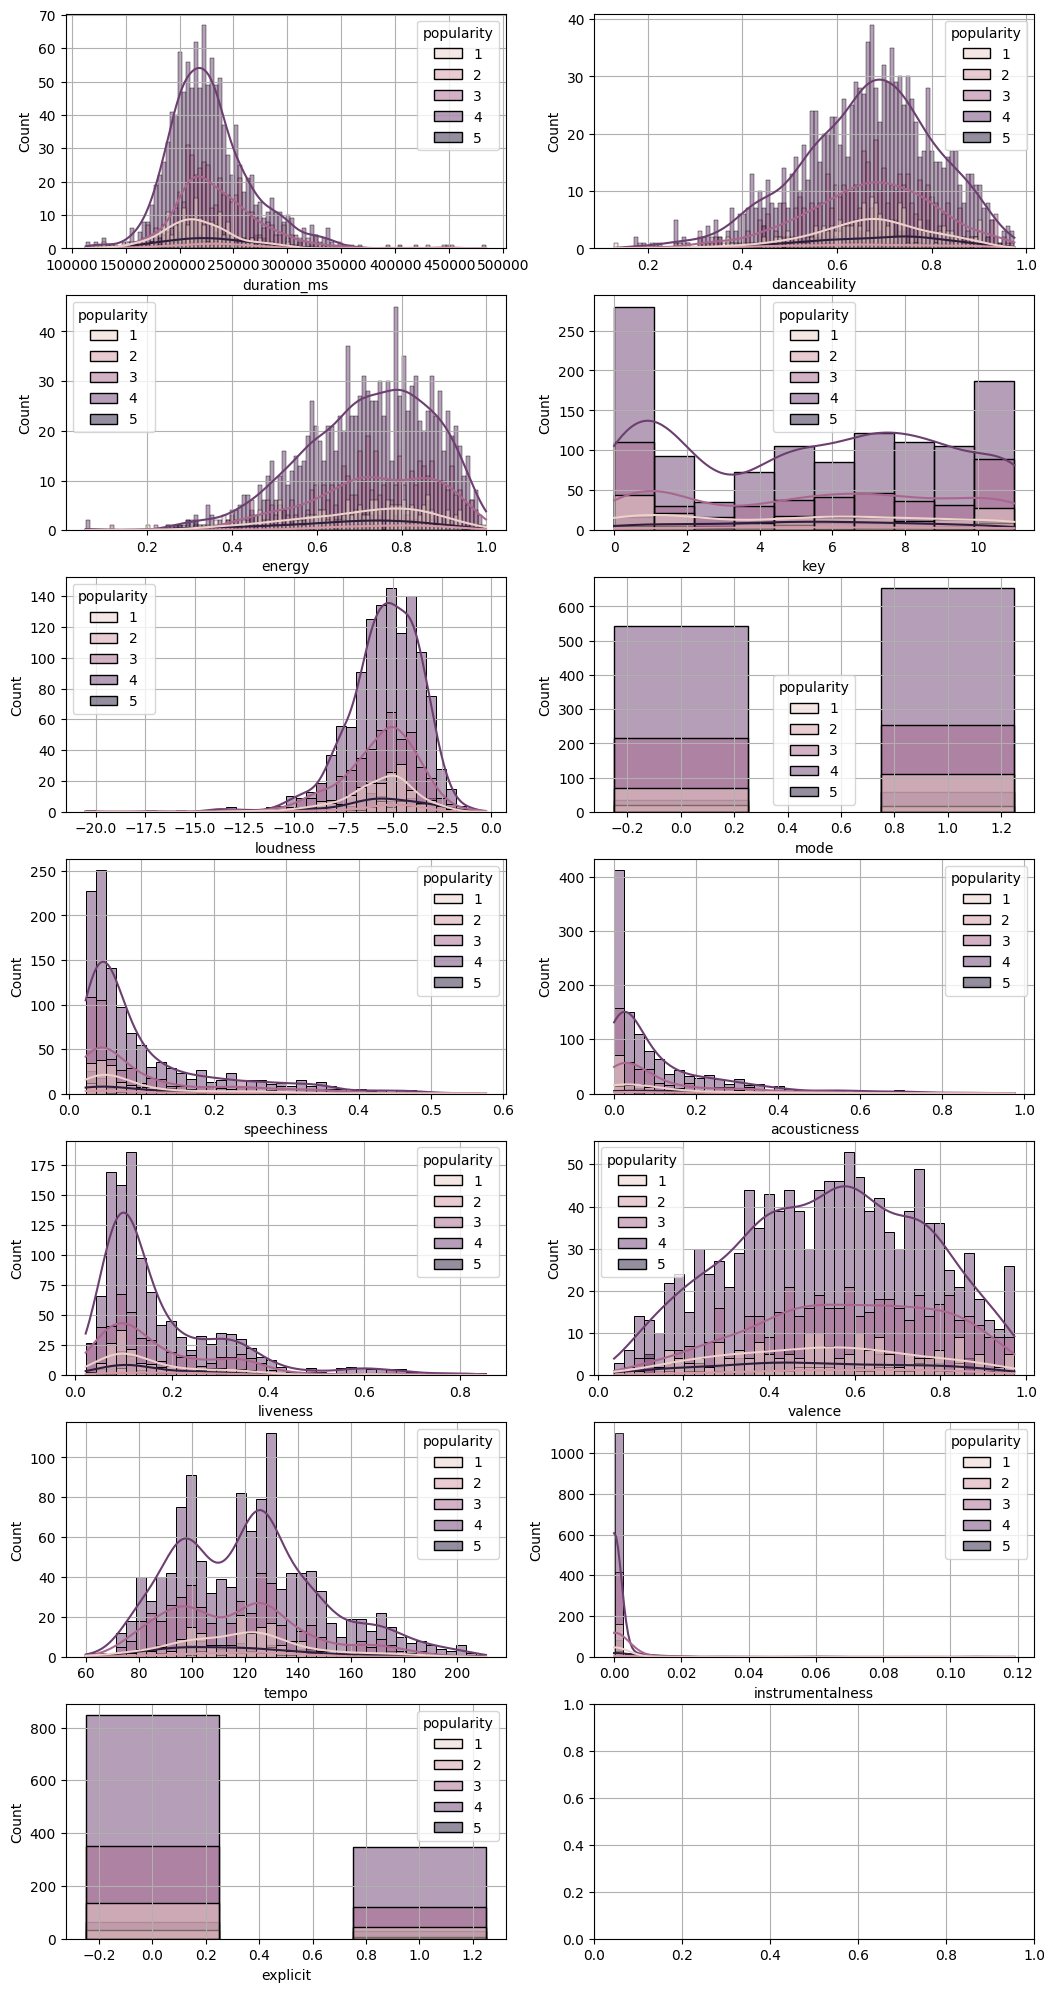

In [14]:
plt.rcParams['axes.grid'] = True

fig, ax = plt.subplots(7,2,figsize=(12.5,25))
sns.histplot(data = df,  x = features[0], ax = ax[0,0],bins = 100,kde = True, hue = "popularity" )
sns.histplot(data = df,  x = features[1], ax = ax[0,1],bins = 100 ,kde = True, hue =  "popularity")
sns.histplot(data = df,  x = features[2], ax = ax[1,0],bins = 100 ,kde = True, hue =  "popularity")
sns.histplot(data = df,  x = features[3], ax = ax[1,1],bins = 10 , kde = True,hue = "popularity" )
sns.histplot(data = df,  x = features[4], ax = ax[2,0],bins = 40 ,kde = True,hue = "popularity" )
sns.histplot(data = df,  x = features[5], ax = ax[2,1],bins = 40 ,shrink = 0.5,discrete = True,hue = "popularity" )
sns.histplot(data = df,  x = features[6], ax = ax[3,0],bins = 40 ,kde = True,hue = "popularity" )
sns.histplot(data = df,  x = features[7], ax = ax[3,1],bins = 40,kde = True, hue = "popularity" )
sns.histplot(data = df,  x = features[8], ax = ax[4,0],bins = 40,kde = True,  hue = "popularity" )
sns.histplot(data = df,  x = features[9], ax = ax[4,1],bins = 40,kde = True,  hue = "popularity" )
sns.histplot(data = df,  x = features[10],ax = ax[5,0],bins = 40,kde = True, hue = "popularity" )
sns.histplot(data =df3 , x = df3["instrumentalness"],bins = 40,ax = ax[5,1],kde = True,shrink = 0.8 , hue = "popularity")
sns.histplot(data = df,  x = features[11] , shrink = 0.5,ax = ax[6,0],discrete = True,hue = "popularity")

plt.savefig('Q2 - distribution of feature for each class.png')
plt.show()

# Section د

In [15]:
from sklearn.preprocessing import  normalize
#df

In [16]:
df_normalized = normalize(df.drop(["popularity","genre","new_genre"],axis=1) , norm='l2')
print(df_normalized)
features2 = df.columns
features2 = features2.tolist()
features2.remove("genre")
features2.remove("popularity")
features2.remove("new_genre")
#print(features2)

pd_df_normalized = pd.DataFrame(df_normalized, columns = features2)
#pd_df_normalized

[[9.99999898e-01 3.55654444e-06 3.94961127e-06 ... 4.23375596e-06
  4.50146762e-04 0.00000000e+00]
 [9.99999603e-01 2.59777470e-06 5.36913342e-06 ... 4.09418870e-06
  8.90222672e-04 0.00000000e+00]
 [9.99999850e-01 2.11138841e-06 1.97967609e-06 ... 1.10957652e-06
  5.46242923e-04 0.00000000e+00]
 ...
 [9.99999879e-01 4.22247983e-06 3.37997795e-06 ... 4.04301198e-06
  4.88471622e-04 0.00000000e+00]
 [9.99999817e-01 4.33259777e-06 3.04041949e-06 ... 2.02889531e-06
  6.02225243e-04 0.00000000e+00]
 [9.99999844e-01 3.22835327e-06 3.53957581e-06 ... 2.56874728e-06
  5.57608609e-04 0.00000000e+00]]


In [17]:
pd_df_normalized["popularity"] = df["popularity"].tolist()

In [18]:
#print(len(pd_df_normalized))
pd_df_normalized
#print(pd_df_normalized["popularity"].unique())
#print(pd_df_normalized["popularity"].nunique())

,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,explicit,popularity
0,1.0,0.000004,0.000004,0.000005,-0.000026,0.000000,2.069521e-07,1.420723e-06,8.382269e-11,1.681189e-06,0.000004,0.000450,0.0,4
1,1.0,0.000003,0.000005,0.000000,-0.000029,0.000006,2.921000e-07,6.165226e-08,0.000000e+00,3.663221e-06,0.000004,0.000890,0.0,4
2,1.0,0.000002,0.000002,0.000028,-0.000036,0.000004,1.157472e-07,6.904919e-07,0.000000e+00,1.001812e-06,0.000001,0.000546,0.0,4
3,1.0,0.000002,0.000004,0.000000,-0.000018,0.000000,2.075788e-07,1.171529e-07,6.013550e-11,1.545705e-06,0.000002,0.000535,0.0,4
4,1.0,0.000003,0.000005,0.000040,-0.000024,0.000000,2.572795e-07,2.034303e-07,5.185479e-09,4.213201e-07,0.000004,0.000861,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1973,1.0,0.000005,0.000004,0.000006,-0.000028,0.000000,3.248151e-07,2.358777e-07,0.000000e+00,5.855511e-07,0.000005,0.000762,0.0,4
1974,1.0,0.000003,0.000004,0.000050,-0.000032,0.000006,8.799162e-07,6.557337e-07,1.154540e-10,5.884790e-07,0.000003,0.000953,0.0,4
1975,1.0,0.000004,0.000003,0.000045,-0.000043,0.000005,5.433888e-07,3.335111e-07,0.000000e+00,1.365950e-06,0.000004,0.000488,0.0,4
1976,1.0,0.000004,0.000003,0.000047,-0.000044,0.000006,3.835606e-07,2.631132e-06,1.151851e-11,1.298025e-06,0.000002,0.000602,0.0,4


In [19]:
print(df.drop(["popularity","genre","new_genre"],axis=1))

      duration_ms  danceability  energy  key  loudness  mode  speechiness  \
0          211160         0.751   0.834    1    -5.444     0       0.0437   
1          167066         0.434   0.897    0    -4.918     1       0.0488   
2          250546         0.529   0.496    7    -9.007     1       0.0290   
3          224493         0.551   0.913    0    -4.063     0       0.0466   
4          200560         0.614   0.928    8    -4.806     0       0.0516   
...           ...           ...     ...  ...       ...   ...          ...   
1995       181026         0.842   0.734    1    -5.065     0       0.0588   
1996       178426         0.552   0.702    9    -5.707     1       0.1570   
1997       200593         0.847   0.678    9    -8.635     1       0.1090   
1998       171029         0.741   0.520    8    -7.513     1       0.0656   
1999       215280         0.695   0.762    0    -3.497     1       0.0395   

      acousticness  instrumentalness  liveness  valence    tempo  explicit 

In [20]:
#for i in range(len(features2)):
print(pd_df_normalized["energy"].unique())
print(pd_df_normalized["energy"].nunique())

[3.94961127e-06 5.36913342e-06 1.97967609e-06 ... 3.37997795e-06
 3.04041949e-06 3.53957581e-06]
1912


### Heat Map

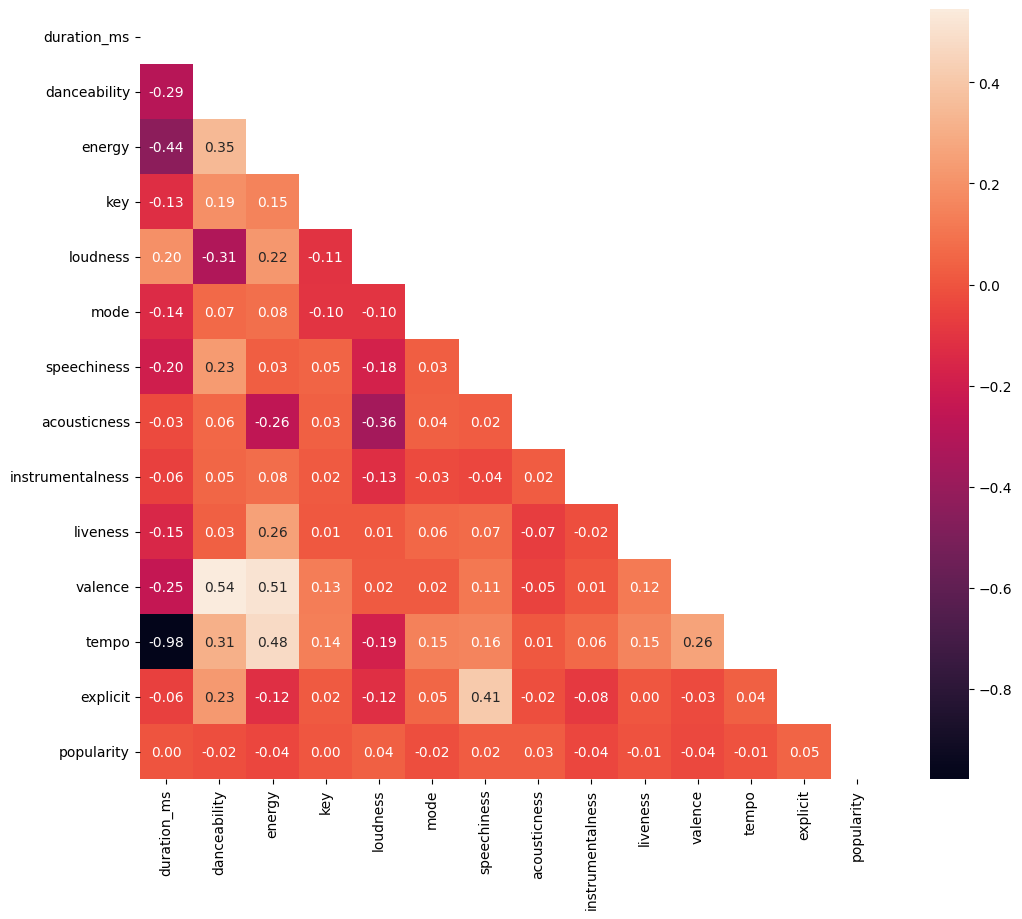

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(pd_df_normalized.corr()))
sns.heatmap(pd_df_normalized.corr(), annot=True, square= False ,linecolor='blue' ,fmt=".2f",mask=mask)
plt.savefig('Q2 - Heat map of correlations between features.png')
plt.show()

### Pair-Plot

<Figure size 2500x2500 with 0 Axes>

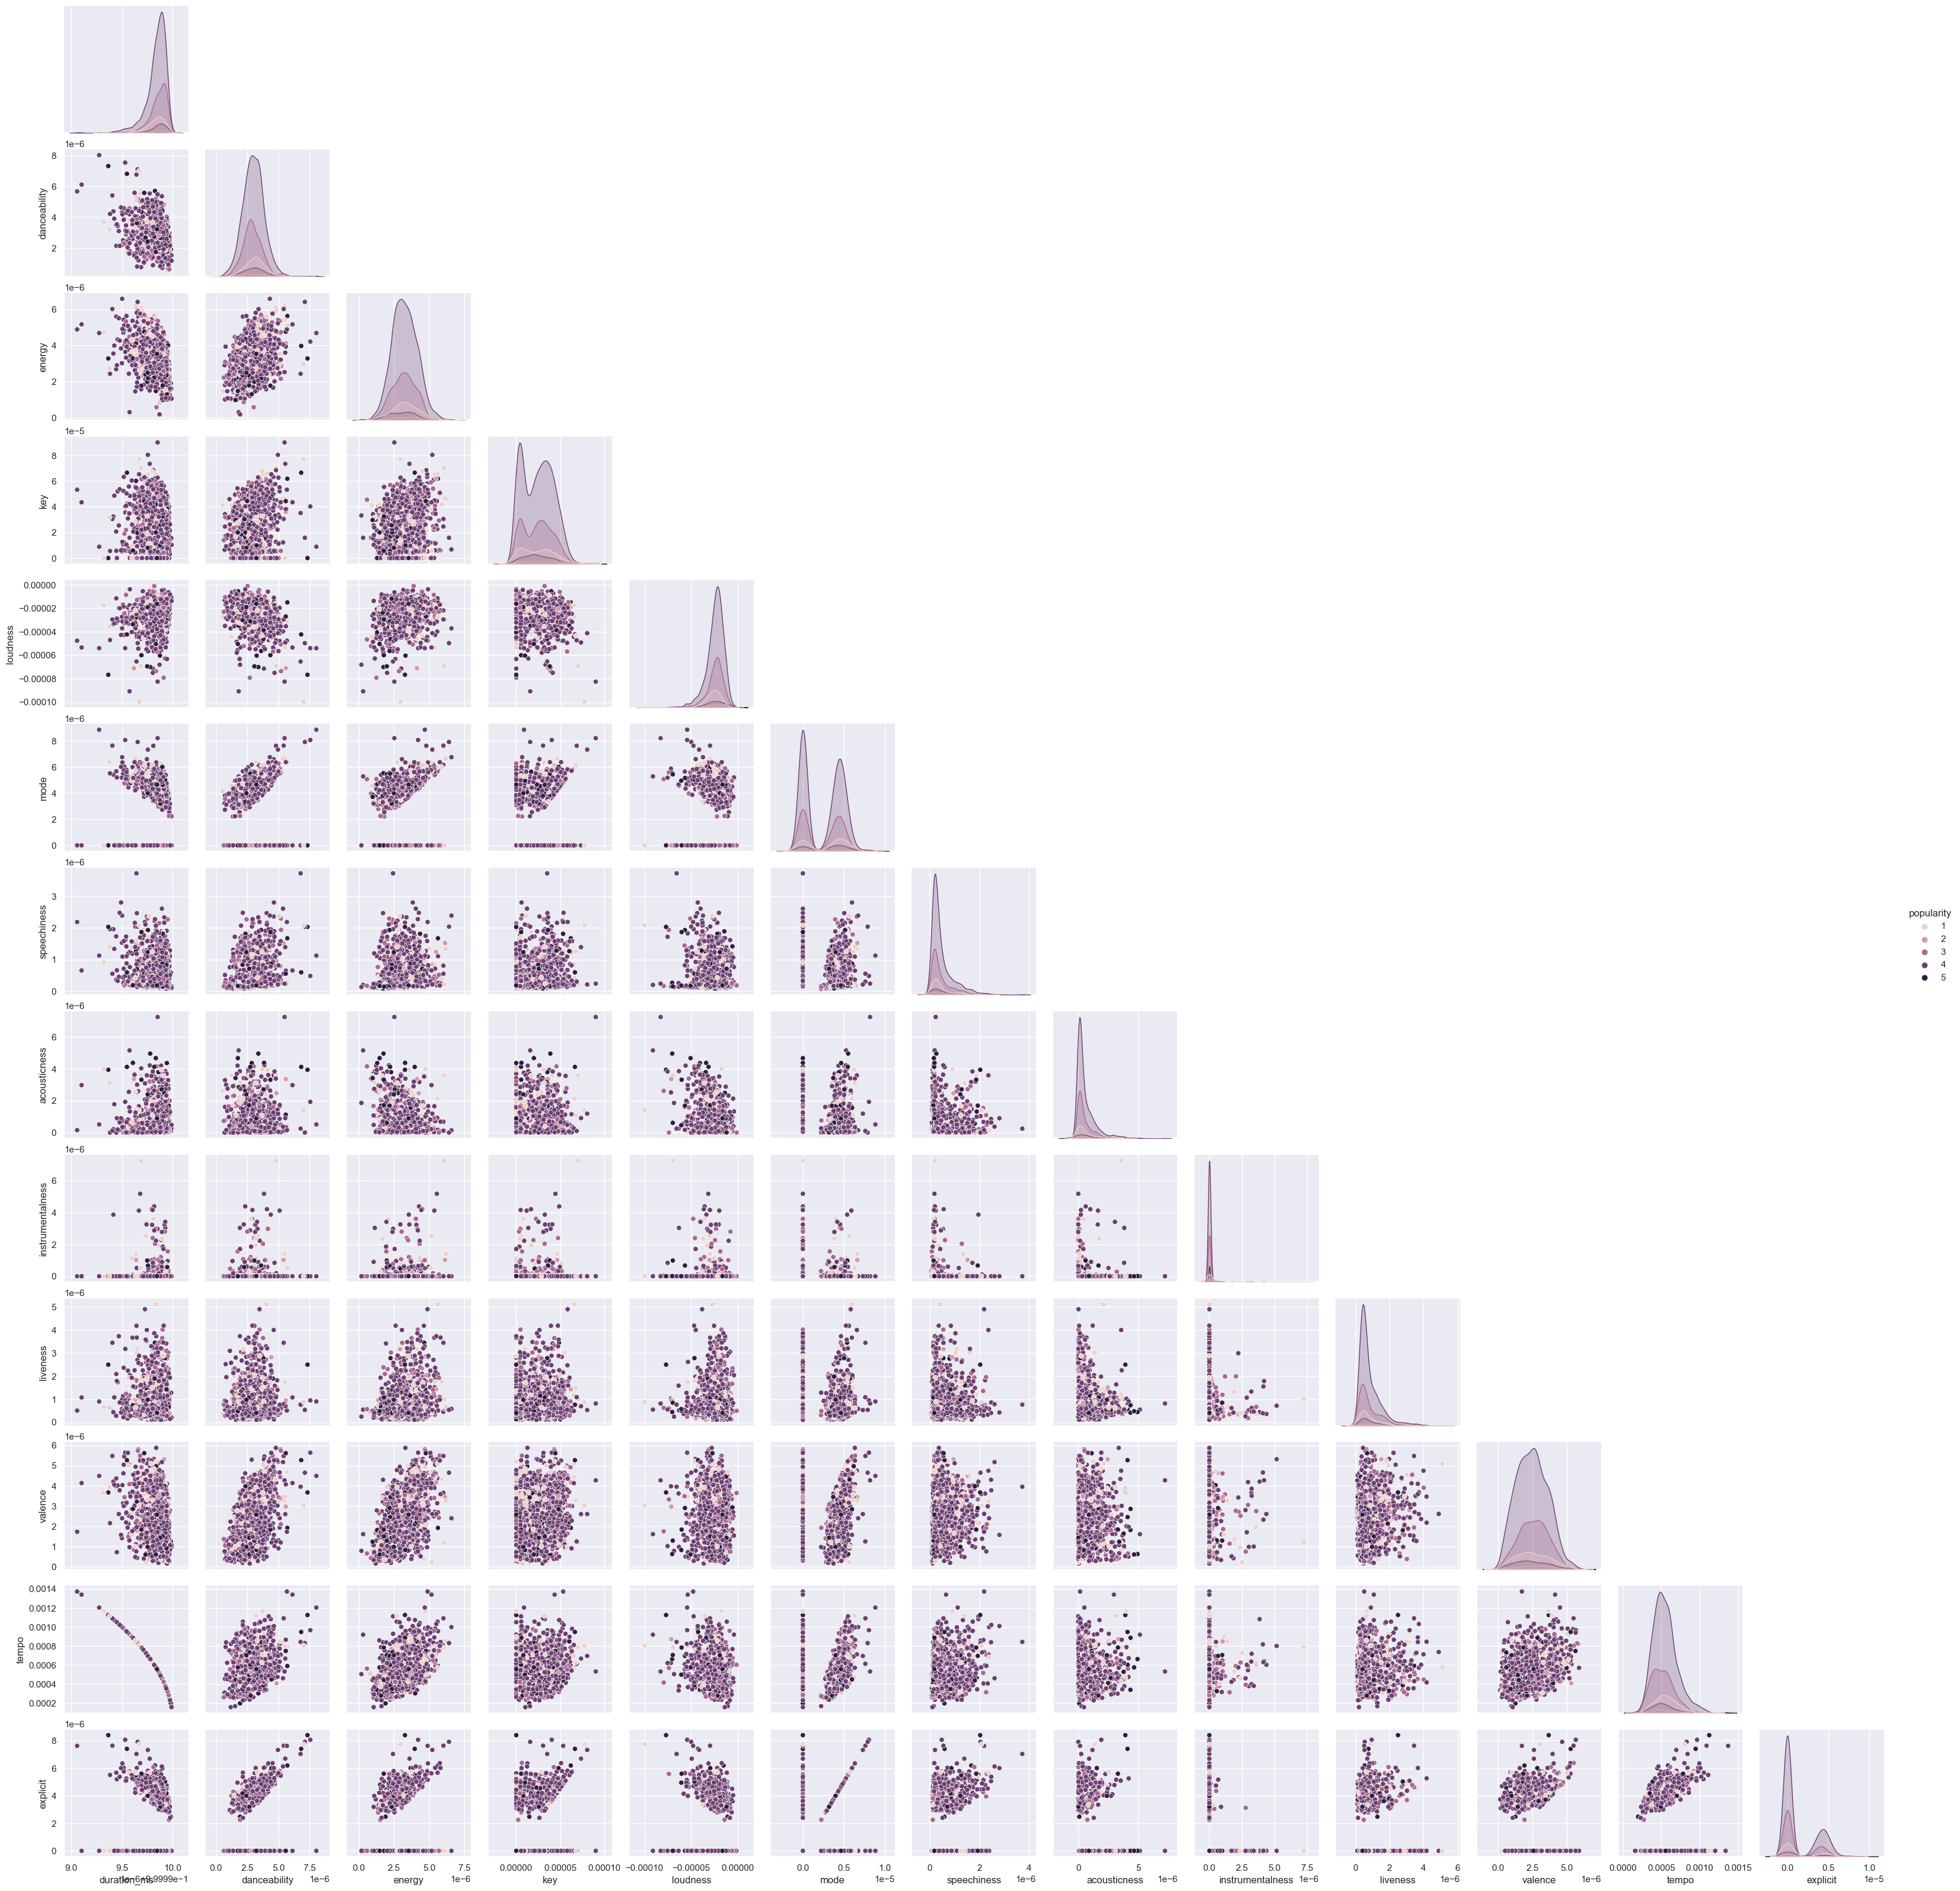

In [22]:
fig = plt.figure(figsize=(25,25))
sns.set()
sns.color_palette("flare",as_cmap = True)
sns_plot = sns.pairplot(pd_df_normalized,
                        corner= True, hue = 'popularity') 
                                #Pair plot of different features
plt.savefig('Q2 - Pair-plot of features.png')
plt.show()

# Section ه

### Train-Test split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold


X_train, X_test, y_train, y_test = train_test_split(pd_df_normalized.drop(["popularity"],axis = 1),
               df["popularity"], test_size=0.1, random_state=1)


# Section و 

### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def cm(df,y_true,y_pred,txt):
    plt.rcParams["figure.autolayout"] = True
    cm = confusion_matrix(y_true, y_pred, labels=df)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df)
    fig, ax = plt.subplots(figsize=(5,5))
    disp.plot(ax = ax)
    plt.title('confusion matrix '+ txt)
    plt.savefig('Q1 - confusion matrix '+ txt + '.png')
    plt.show()

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [26]:
param_dist = {"max_depth": [3,4,5],
              "max_features": randint(1, 9),
              "criterion": ["gini","log_loss" ,"entropy"]}
cv=KFold(n_splits=9,random_state = 0 , shuffle = True)
tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=9)

tree_cv.fit(X_train, y_train)   # Fit it to the data

#Parameter tuning and it's score

print(f"Tuned Decision Tree Parameters: {tree_cv.best_params_}")
print(f"Best score for Decision Tree is: {tree_cv.best_score_}")
pred_tree_cv = tree_cv.predict(X_test)

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2}
Best score for Decision Tree is: 0.5988736775538804


### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
param_dist2 = {"max_depth": [3,5,7],
              "criterion": ["gini", "entropy", "log_loss"],
             "n_estimators" : [50,100,150,200],
              "max_features" : ["sqrt", "log2"]}

cv=KFold(n_splits=9,random_state = 0 , shuffle = True)

rand_for = RandomForestClassifier()
rand_for_cv = RandomizedSearchCV(rand_for, param_dist2, cv=9)

rand_for_cv.fit(X_train, y_train)   # Fit it to the data

#Parameter tuning and it's score

print(f"Tuned Random Forest Parameters: {rand_for_cv.best_params_}")
print(f"Best score for Random Forest is: {rand_for_cv.best_score_}")
pred_rand_for_cv = rand_for_cv.predict(X_test)

Tuned Random Forest Parameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'log_loss'}
Best score for Random Forest is: 0.599440541910931


### K- Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
param_dist3 = {"n_neighbors": [3,4,5],
               "metric": ["minkowski","l1","l2"],
               "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
               "weights": ["uniform", "distance"]}

knn = KNeighborsClassifier()
knn_cv = RandomizedSearchCV(knn, param_dist3, cv=cv)

knn_cv.fit(X_train, y_train)   # Fit it to the data

#Parameter tuning and it's score

print(f"Tuned K-Nearest Neighbors Parameters: {knn_cv.best_params_}")
print(f"Best score for KNN is: {knn_cv.best_score_}")
pred_knn_cv = knn_cv.predict(X_test)

Tuned K-Nearest Neighbors Parameters: {'weights': 'distance', 'n_neighbors': 5, 'metric': 'minkowski', 'algorithm': 'brute'}
Best score for KNN is: 0.5404951944715058


### SVM

In [31]:
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV

In [32]:
param_dist4 = {"gamma": [0.1,0.25,0.5,1],
               "C": [0.1,0.25,0.5,1],
               "kernel": ["linear", "poly", "rbf", "sigmoid"],
               "degree": [2,3,4],
               "decision_function_shape": ["ovo", "ovr"]}
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
SVC_cv = RandomizedSearchCV(SVC(), param_dist4, cv=9)
SVC_cv.fit(X_train, y_train)

#Parameter tuning and it's score

print(f"Tuned SVC  Parameters: {SVC_cv.best_params_}")
print(f"Best score for SVC is: {SVC_cv.best_score_}")
pred_SVC_cv = SVC_cv.predict(X_test)

Tuned SVC  Parameters: {'kernel': 'rbf', 'gamma': 0.25, 'degree': 4, 'decision_function_shape': 'ovo', 'C': 0.5}
Best score for SVC is: 0.5994376933463227


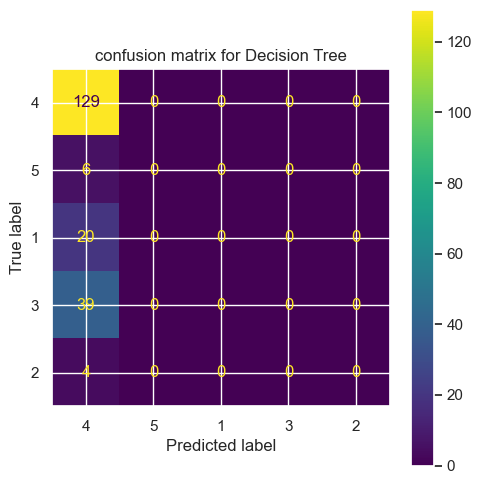

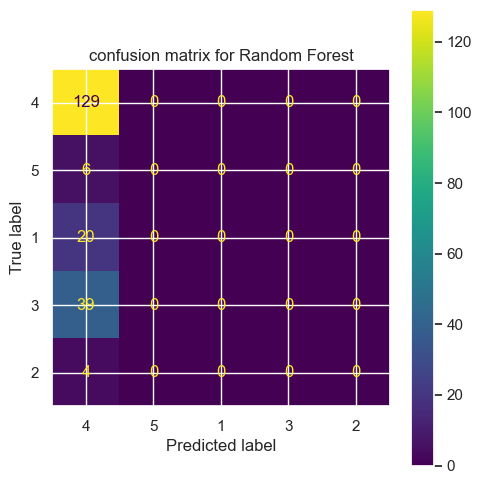

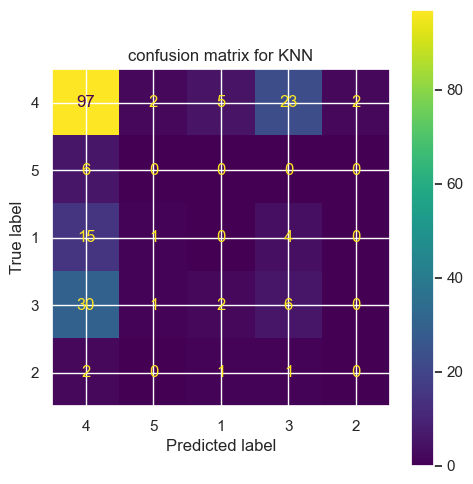

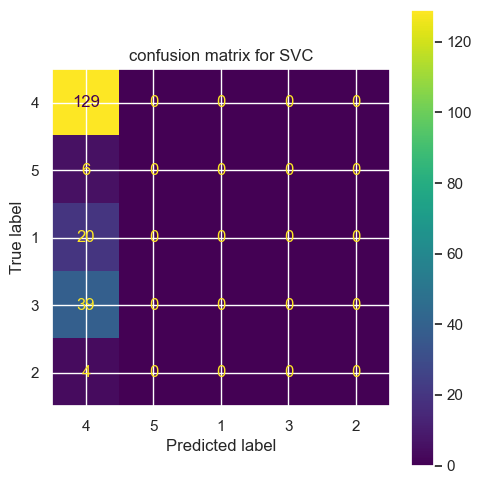

In [33]:
cm(df["popularity"].unique(),y_test,pred_tree_cv,"for Decision Tree")
cm(df["popularity"].unique(),y_test,pred_rand_for_cv,"for Random Forest")
cm(df["popularity"].unique(),y_test,pred_knn_cv,"for KNN")
cm(df["popularity"].unique(),y_test,pred_SVC_cv,"for SVC")
plt.show()

# Section ح

### counting genres

In [34]:
#print(genre_list)
genre_sectionH = flatten(genre_list)
#print(genre_sectionH)
#print(len(genre_sectionH))

counting_name = []
count = 0

for item in genres_final_list_print:
    counting_name.append("Total "+item+" in songs")
    #print(counting_name)
    num = genre_sectionH.count(item)
    print(f"{counting_name[count]}: {num}")
    #print(i)
    count += 1

Total jazz in songs: 2
Total Dance/Electronic in songs: 390
Total easy listening in songs: 7
Total hip hop in songs: 778
Total blues in songs: 4
Total country in songs: 21
Total classical in songs: 1
Total latin in songs: 64
Total World/Traditional in songs: 10
Total rock in songs: 234
Total Folk/Acoustic in songs: 20
Total pop in songs: 1633
Total metal in songs: 66
Total R&B in songs: 452


### R&B probability based on Bayes' rule

In [35]:
   # P("pop" , "hip hop")
count1 = 0

for item in genre_list:
    x = item.count("pop")
    y = item.count("hip hop")
    if x > 0 and y >0 :
        count1 += 1 

P_pop_hiphop = count1/len(genre_list)
print(f"P(pop , hip hop):{P_pop_hiphop}")
  
    # P("R&B")
count2= 0  

for item in genre_list:
    x = item.count("R&B")
    if x > 0 :
        count2+= 1 

#print(count2)
P_RanB = count2/len(genre_list)
print(f"P(R&B):{P_RanB}")

    # P("pop","hip hop" | "R&B")
countRanB = 0
count_cond = 0
for item in genre_list:
    z = item.count("R&B")
    if z > 0:
        countRanB += 1
        x = item.count("pop")
        y = item.count("hip hop")
        if x > 0 and y >0 :
            count_cond += 1 

P_pop_hh_cond_RanB = count_cond  / countRanB
print(f"P(pop, hip hop | R&B):{P_pop_hh_cond_RanB}\n\n")
print(f"P(R&B | pop, hip hop) based on Bayes'rule :{P_pop_hh_cond_RanB * P_RanB/P_pop_hiphop}")

P(pop , hip hop):0.3190091001011122
P(R&B):0.22851365015166836
P(pop, hip hop | R&B):0.5530973451327433


P(R&B | pop, hip hop) based on Bayes'rule :0.39619651347068147
